# QuickLook Dataset

## Online Shoppers Purchasing Intention

## Import Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
print('Numpy Version:', np.__version__)
print('Pandas Version:', pd.__version__)
print('Seaborn Version:', sns.__version__)

Numpy Version: 1.21.6
Pandas Version: 1.3.5
Seaborn Version: 0.11.2


## Mengubah parameter default matplotlib

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Dataset

In [6]:
df = pd.read_csv('/content/drive/My Drive/Final Project - Purchasing Intention Prediction On Online Shopper/online_shoppers_intention.csv')
df1 = pd.read_csv('/content/drive/My Drive/Final Project - Purchasing Intention Prediction On Online Shopper/online_shoppers_intention.csv')

another read to dataset in local computer

In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')

# STAGE 1 - Exploratory Data Analysis

## 1. Descriptive Statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Pengamatan:**
* data terdiri dari 12330 baris
* Terdapat 4 jenis tipe data yaitu int, float, string dan boolean
* Tidak ada issue yang mencolok pada tiap kolom dan tipe datanya (sudah sesuai)
* Tidak ada kolom yang memiliki nilai kosong

**##2. Cuplikan Data**

In [8]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5382,0,0.000000,0,0.0,8,429.000000,0.000000,0.050000,0.000000,0.0,May,2,2,1,2,Returning_Visitor,False,False
2277,7,164.500000,0,0.0,73,3022.478571,0.002632,0.026472,4.254250,0.0,May,2,2,5,1,Returning_Visitor,False,False
5277,3,62.142857,0,0.0,23,1046.916667,0.000000,0.004348,17.373913,0.0,May,2,2,7,1,Returning_Visitor,True,True
6059,8,139.200000,0,0.0,49,3346.969048,0.000000,0.008472,12.574018,0.0,Nov,2,6,1,2,Returning_Visitor,False,False
11382,3,19.000000,0,0.0,120,3013.116917,0.001681,0.007408,14.183916,0.0,Nov,2,5,1,2,Returning_Visitor,False,True


**Pengamatan:**
* Setelah sample dirunning beberapa kali terlihat beberapa feature banyak memiliki nilai 0, apakah termasuk anomali?

## 3. Statistical Summary

### Pick + Separate Columns

In [9]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
cats = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
# cat=data.columns[10:]
# data[cat]=data[cat].astype('category')

In [10]:
df[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [11]:
df_cats = df[cats].astype('category').copy()

In [12]:
df_cats.describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Pengamatan**
- Untuk yang categorical, type datanya masih integer dan float, yaitu TrafficType, Browser, OperatingSystem, Month.
- Tidak ada missing values pada dataset
- untuk nilai max pada setiap kolom, sebagian besar sangat jauh diatas nilai mean/mediannya, kolom `Administrative`, `Informational`, `BounceRates`, `ExitRates`, `SpecialDay` sementara diasumsikan cukup simetrik, Kolom `Administrative_Duration`, `Informational_Duration`, `ProductRelated`, `ProductRelated_Duration`, `PageValues` tampaknya skew ke kanan (long-right tail). kemungkinan terdapat outlier.

Perlu diperhatikan untuk mean dari data numerik yang menggambarkan durasi, mean dari product related duration sangat jauh dari duration yang lain.

Konsumen yang paling banyak mengunjungi adalah dari returning visitor.

Pembelian terbanyak terjadi saat weekdays.

Rata-rata halaman yang banyak dibaca pelanggan adalah halaman produk dengan rata-rata 31 dibanding dengan halaman info yang hanya dibaca 0.5 halaman.

Pada data kategorikal ditemukan feature dengan unique value cukup banyak lebih dari 5 , akan menjadi pertimbangan apakah akan digunakan atau tidak.




## 4. Value Counting
Kita dapat memastikan pengamatan mengenai kolom-kolom categorical di atas dengan value counting

In [14]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Value count kolom OperatingSystems:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Value count kolom Browser:
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Value count kolom Region:
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Value count kolom TrafficType:
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

Value count kolom VisitorType:
Return

## 5. Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Box plots

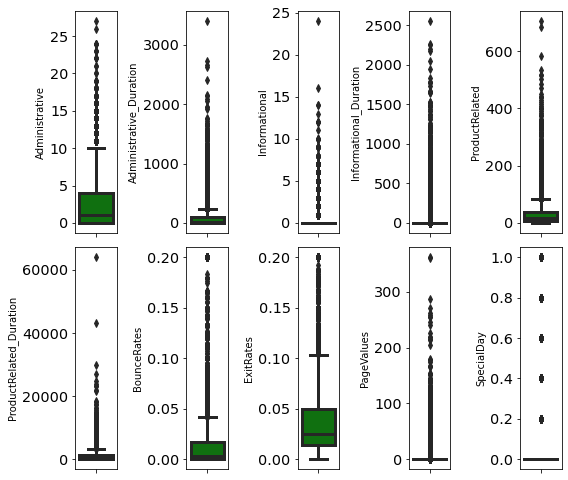

In [15]:
features = nums
plt.figure(figsize=(8, 10))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

### Dist plots

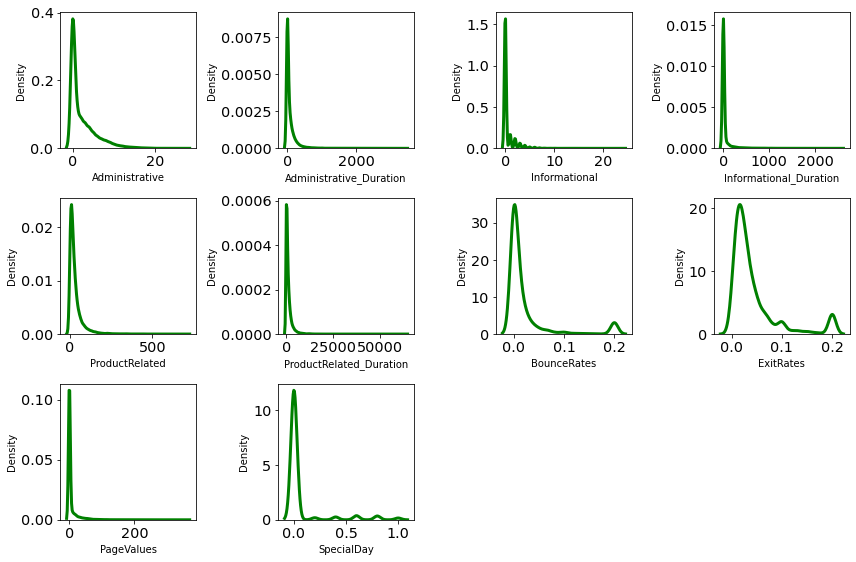

In [16]:
features = nums
plt.figure(figsize=(12, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

### Count plot (categorical)

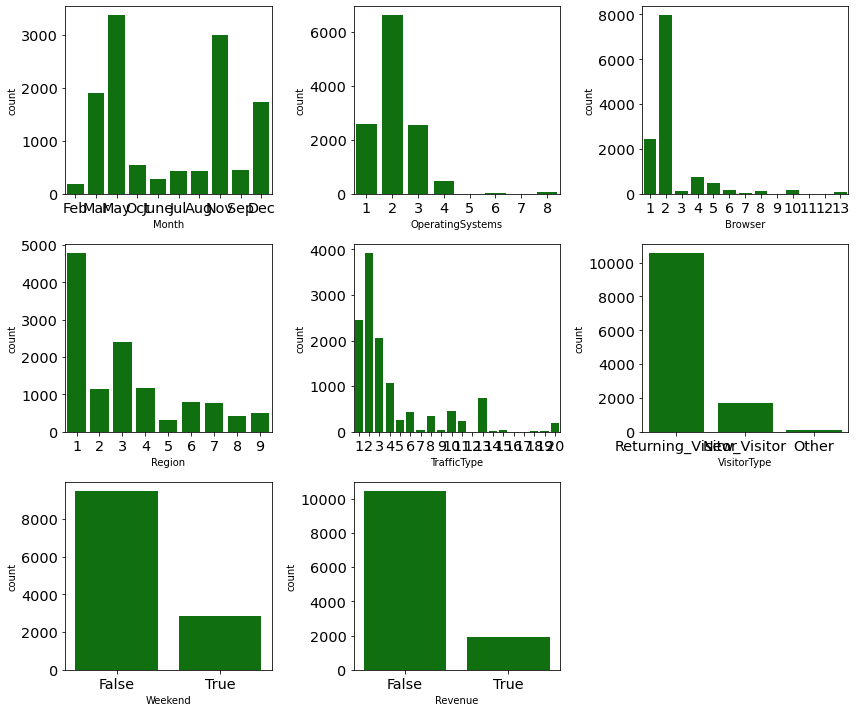

In [17]:
plt.figure(figsize=(12, 10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[cats[i]], color='green', orient='v')
    plt.tight_layout()

**Pengamatan**

1.  Berdasarkan visualisasi Dist Plot terlihat bahwa hampir seluruh kolom adalah berdistribusi postive-skewed, kemungkan kita akan melakukan normalisasi dengan log transformation dan oversampling.

2. Bimodal: informational, ExitRate, BounceRate, dan SpecialDay.

3. Berdasarkan visualisasi box plot terlihat bahwa seluruh kolom memiliki outliers yang nilainya jauh dari IQR atas maka saat data pocessing perlu dilakukan z-score.

4. Terdapat nilai mendominasi pada tiap kolom seperti:

    a. Kunjungan pada Mei dan November, Banyak pengunjung bulan Mei, perlu dilihat apa ada banyak SpecialDay disini atau ada event tertentu.
    
    b. Penggunaan OperatingSystem 1, 2, 3, dan 4 sangat dominan dibanding beberapa OperatingSystem lainnya.
    
    c. Browser 1,2,4,5, mendominasi diantara 13 browser yang ada.
    
    d. Region didominasi oleh Region 1 dan 3
    
    e. TrafficType didominasi oleh 1,2,3, dan 4 dari 20 TrafficType yang ada.
    
    f. VisitorType didominasi oleh returning visitor
    
    g. Banyak pembelian dilakukan saat weekdays kebanyakan pengunjung adalah pengunjung lama
    
    
5. Ada beberapa data yang kategorinya lebih dari 5, yaitu operating systems, browser, Region dan Traffic Type. Jika ada kemungkinan di olah untuk mengelompokkan lebih kecil, maka akan dikelompokkan, tapi jika tidak mungkin maka dihapus saja yang lebih dari 10.

6. Untuk traffic type bisa dikelompokkan berdasarkan 1-100 Type A, 100-1000 Type B, 1000+ Type C
    Region dikelompokkan.






## 6. Bivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

In [18]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


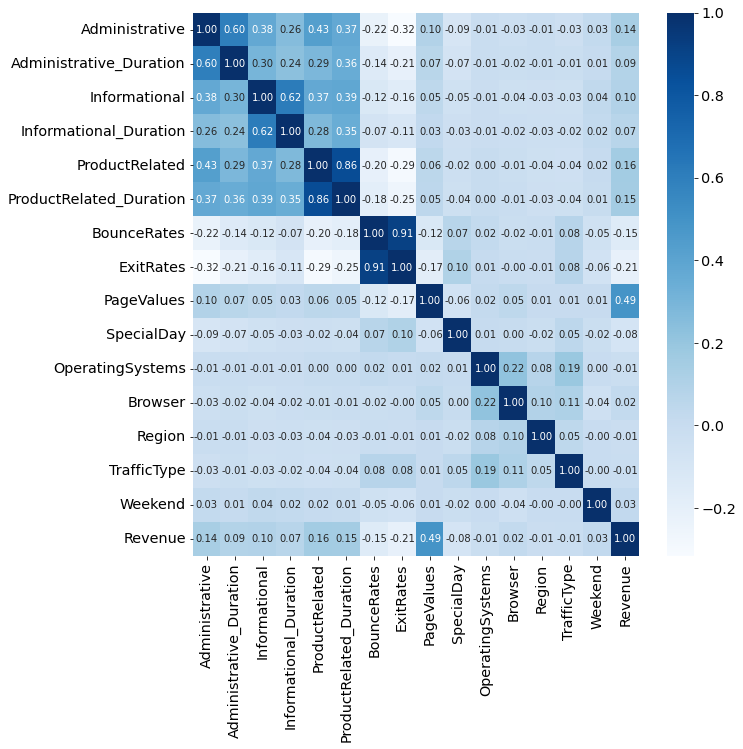

In [19]:
# correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**Pengamatan:**

A.Target kita `Revenue` korelasi positif cukup kuat dengan `PageValues` (strong potential feature)
* Target kita `Revenue` korelasi negatif sedang dengan `BounceRates`, `ExitRates`, ProductRelated, dan ProductRelated_Duration (dapat dipertimbangkan)
* `Revenue` memiliki korelasi positif lemah dengan `ProductRelated`, `ProductRelated_Duration`, `Adminisitrative`, `Adminisitrative_Duration`, `Informational`, `Informational_Duration` (decent potential feature)
* `Revenue` memiliki korelasi negatif lemah dengan `SpecialDay`(decent potential feature)

B.`ProductRelated` memiliki korelasi positif cukup kuat dengan `ProductRelated_Duration` begitu pula `BounceRates` dengan `ExitRates`. Ada kemungkinan keempat *feature* ini redundan (dipilih salah satu diantara 2 saja untuk training data)

Kami mengasumsikan dengan benchmark sebagai berikut :

0.05-0.14 (lemah)

0.15-0.3 (sedang)

0.3++(kuat)

Notes: Korelasi antar kolom dan korelasi pada target bisa berubah setelah data di pre-process, sehingga kesimpulan kami pada nomor ini masih bersifat sementara. Kemungkinan masih akan berubah setelah data dibersihkan

<Figure size 1440x1440 with 0 Axes>

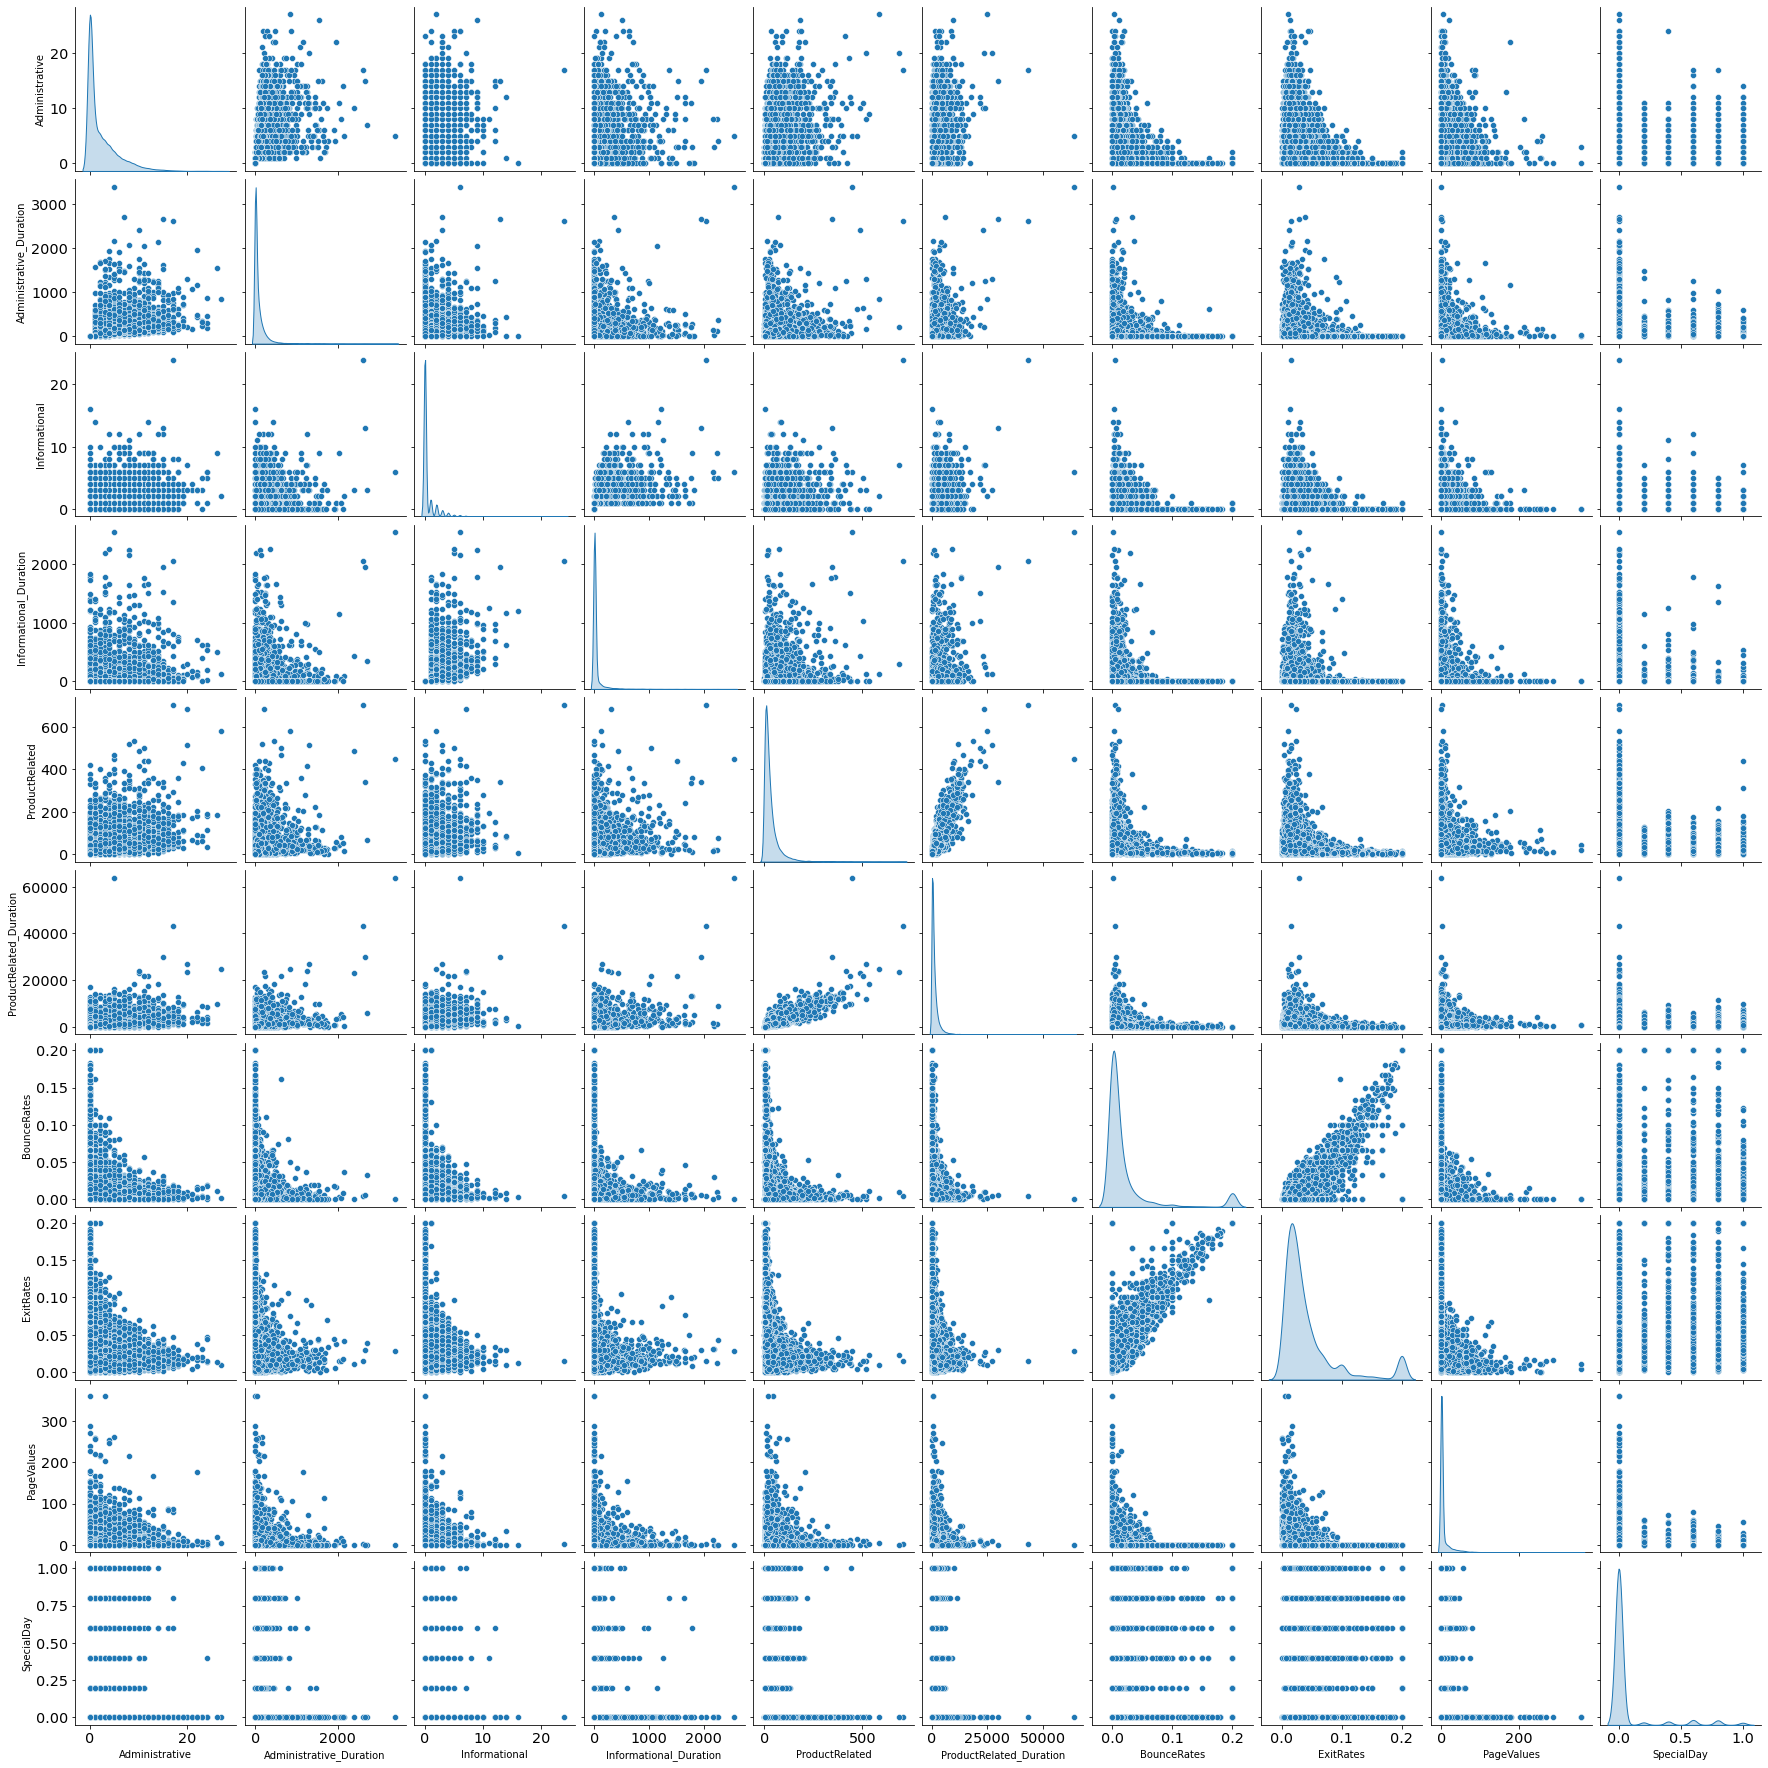

In [20]:
plt.figure(figsize=(20, 20))
sns.pairplot(df[nums], diag_kind='kde')

### Category columns VS Target Variable

**Catatan:**
Tidak dapat dilakukan karena target variabel bertipe category juga

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

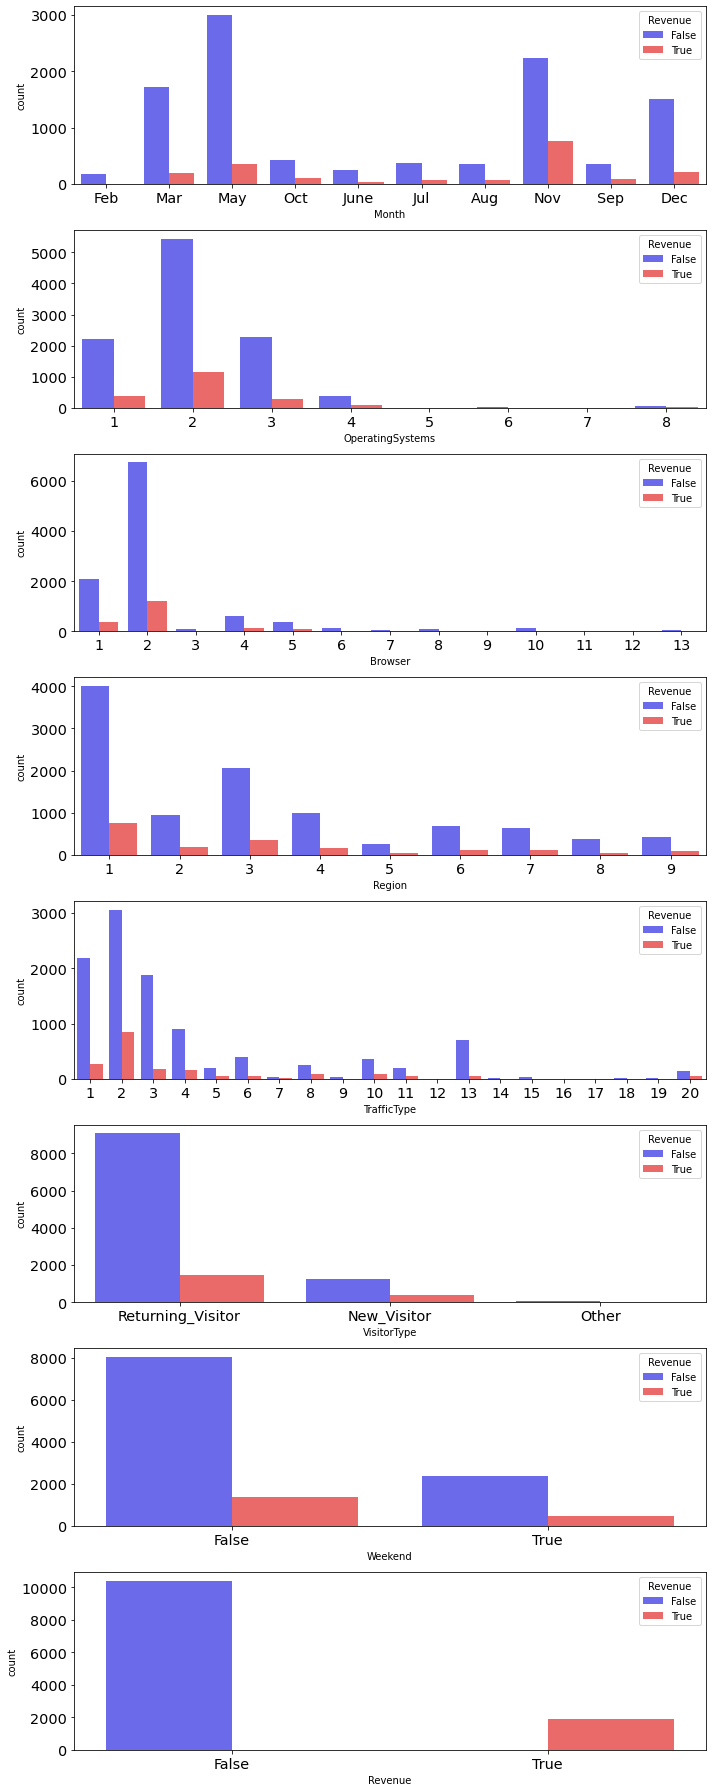

In [22]:
features = cats
plt.figure(figsize=(10, 25))
for i in range(0, len(features)):
    plt.subplot(8, 1, i+1) 
    sns.countplot(x=features[i], data=df,  palette="seismic", hue="Revenue")
    #plt.xlabel(features[i])
    plt.tight_layout()

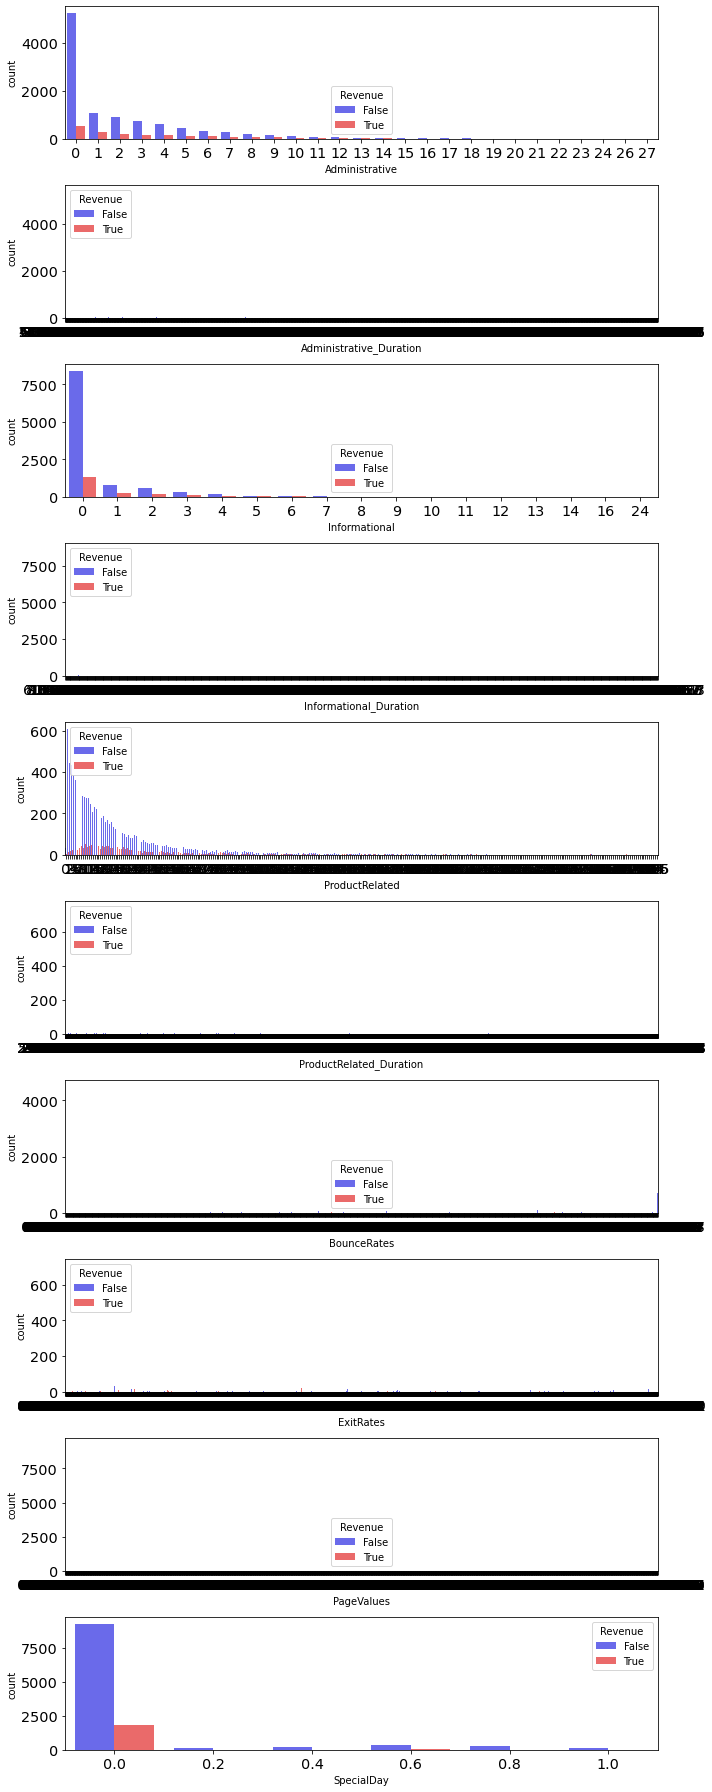

In [23]:
features = nums
plt.figure(figsize=(10, 25))
for i in range(0, len(features)):
    plt.subplot(10, 1, i+1) 
    sns.countplot(x=features[i], data=df,  palette="seismic", hue="Revenue")
    #plt.xlabel(features[i])
    plt.tight_layout()

In [24]:
df_month = df.groupby(['Month','Revenue'])['PageValues'].count().reset_index()
df_month
#df_month.rename(columns={'PageValues':'Jumlah'}, inplace=True)

,Month,Revenue,PageValues
0,Aug,False,357
1,Aug,True,76
2,Dec,False,1511
3,Dec,True,216
4,Feb,False,181
5,Feb,True,3
6,Jul,False,366
7,Jul,True,66
8,June,False,259
9,June,True,29


In [25]:
df_2=df.groupby(['Month'])['PageValues'].count()
df_merge=df_month.merge(df_2, on = 'Month')
df_merge

,Month,Revenue,PageValues_x,PageValues_y
0,Aug,False,357,433
1,Aug,True,76,433
2,Dec,False,1511,1727
3,Dec,True,216,1727
4,Feb,False,181,184
5,Feb,True,3,184
6,Jul,False,366,432
7,Jul,True,66,432
8,June,False,259,288
9,June,True,29,288


In [26]:
df_merge['Percent']=round(df_merge['PageValues_x']/df_merge['PageValues_y']*100,2)
df_merge

,Month,Revenue,PageValues_x,PageValues_y,Percent
0,Aug,False,357,433,82.45
1,Aug,True,76,433,17.55
2,Dec,False,1511,1727,87.49
3,Dec,True,216,1727,12.51
4,Feb,False,181,184,98.37
5,Feb,True,3,184,1.63
6,Jul,False,366,432,84.72
7,Jul,True,66,432,15.28
8,June,False,259,288,89.93
9,June,True,29,288,10.07


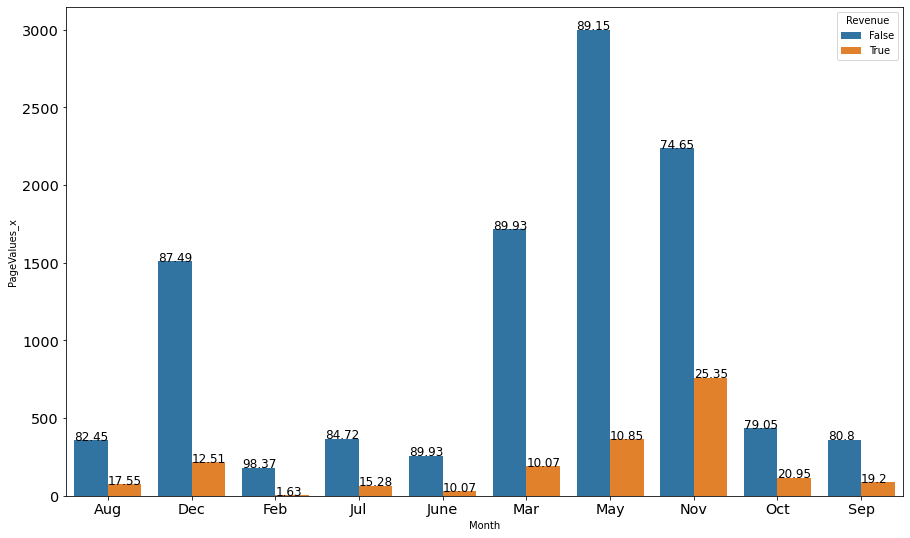

In [27]:
plt.figure(figsize = (15, 9))
sns.barplot(x='Month', y='PageValues_x', data=df_merge, hue='Revenue')
x_numbers = range(df_merge.shape[0])
for i in x_numbers:
    if i%2 == 0:
        plt.text(x = x_numbers[i]/2-0.4 , y = df_merge['PageValues_x'][i]+0.5, s = round(df_merge['Percent'][i], 2), size = 12)
    elif i%2 !=0:
         plt.text(x = x_numbers[i]/2-0.5 , y = df_merge['PageValues_x'][i]+0.5, s = round(df_merge['Percent'][i], 2), size = 12)

In [28]:
df_VisitorType = df.groupby(['VisitorType','Revenue'])['PageValues'].count().reset_index()
df_3=df.groupby(['VisitorType'])['PageValues'].count()
df_Visitor=df_VisitorType.merge(df_3, on = 'VisitorType')
df_Visitor

,VisitorType,Revenue,PageValues_x,PageValues_y
0,New_Visitor,False,1272,1694
1,New_Visitor,True,422,1694
2,Other,False,69,85
3,Other,True,16,85
4,Returning_Visitor,False,9081,10551
5,Returning_Visitor,True,1470,10551


In [29]:
df_Visitor['Percent']=round(df_Visitor['PageValues_x']/df_Visitor['PageValues_y']*100,2)
df_Visitor

,VisitorType,Revenue,PageValues_x,PageValues_y,Percent
0,New_Visitor,False,1272,1694,75.09
1,New_Visitor,True,422,1694,24.91
2,Other,False,69,85,81.18
3,Other,True,16,85,18.82
4,Returning_Visitor,False,9081,10551,86.07
5,Returning_Visitor,True,1470,10551,13.93


Text(2.25, 2500, 'But why is the Conv of Returning lower?')

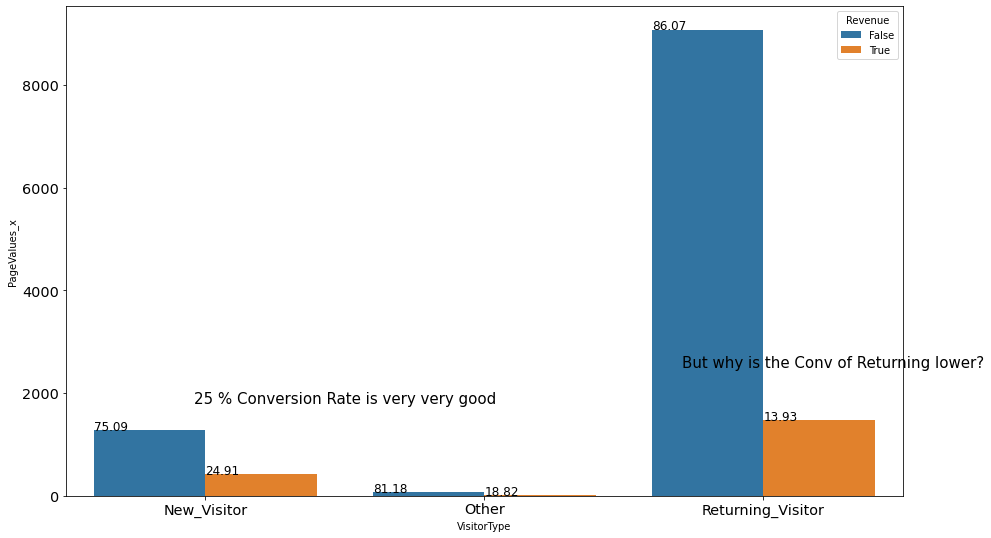

In [30]:
plt.figure(figsize = (15, 9))
sns.barplot(x='VisitorType', y='PageValues_x', data=df_Visitor, hue='Revenue')
x_numbers = range(df_Visitor.shape[0])
for i in x_numbers:
    if i%2 == 0:
        plt.text(x = x_numbers[i]/2-0.4 , y = df_Visitor['PageValues_x'][i]+0.5, s = round(df_Visitor['Percent'][i], 2), size = 12)
    elif i%2 !=0:
         plt.text(x = x_numbers[i]/2-0.5 , y = df_Visitor['PageValues_x'][i]+0.5, s = round(df_Visitor['Percent'][i], 2), size = 12)

plt.text(x= 0.5, y= 1800, s='25 % Conversion Rate is very very good', ha='center', fontsize=15)
plt.text(x=2.25, y=2500, s='But why is the Conv of Returning lower?', ha='center',fontsize=15)

Text(0.5, 0.98, 'Who is OTHER Visitor? Robot? Why is it Buying?')

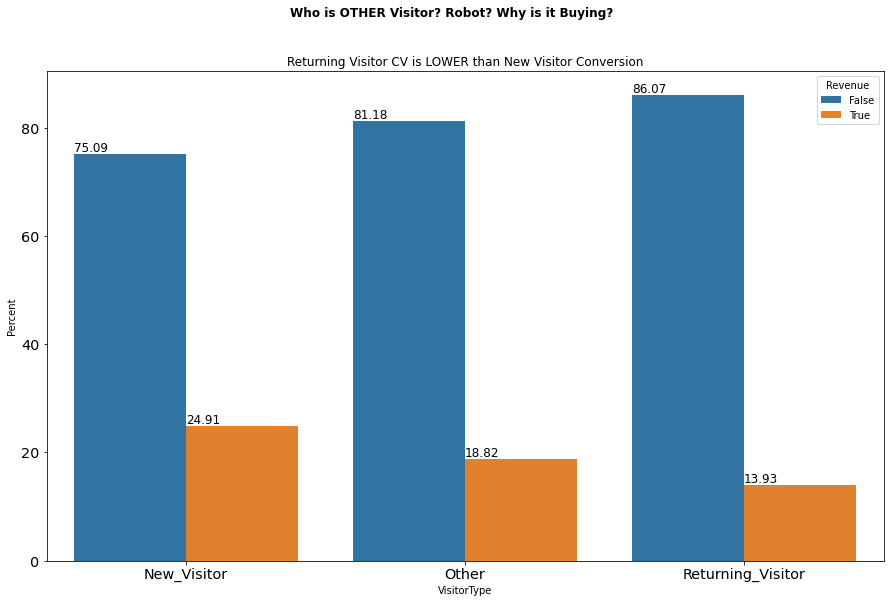

In [31]:
plt.figure(figsize = (15, 9))
sns.barplot(x='VisitorType', y='Percent', data=df_Visitor, hue='Revenue')
x_numbers = range(df_Visitor.shape[0])
for i in x_numbers:
    if i%2 == 0:
        plt.text(x = x_numbers[i]/2-0.4 , y = df_Visitor['Percent'][i]+0.5, s = round(df_Visitor['Percent'][i], 2), size = 12)
    elif i%2 !=0:
         plt.text(x = x_numbers[i]/2-0.5 , y = df_Visitor['Percent'][i]+0.5, s = round(df_Visitor['Percent'][i], 2), size = 12)
plt.title('Returning Visitor CV is LOWER than New Visitor Conversion')
plt.suptitle('Who is OTHER Visitor? Robot? Why is it Buying?', weight='bold')

In [32]:
df_month.pivot(index='Month',columns='Revenue', values='PageValues')

Revenue,False,True
Month,,
Aug,357,76
Dec,1511,216
Feb,181,3
Jul,366,66
June,259,29
Mar,1715,192
May,2999,365
Nov,2238,760
Oct,434,115


In [33]:
df_grup=df.groupby(['VisitorType']).agg({'Informational_Duration':['mean','max'],
'Administrative_Duration':['mean','max'],
'ProductRelated_Duration':['mean','max']}).reset_index()

In [34]:
df_grup

VisitorType Informational_Duration               \
                                       mean          max   
0        New_Visitor              19.237472  1779.166667   
1              Other              11.685490   410.500000   
2  Returning_Visitor              37.101992  2549.375000   

  Administrative_Duration          ProductRelated_Duration                
                     mean      max                    mean           max  
0               91.911315  1946.00              636.393354  12983.787710  
1               62.695588  1652.00              570.404862   9630.209524  
2               79.183639  3398.75             1289.421490  63973.522230

In [35]:
df_grup.columns=['VisitorType','rata_info','max_info','rata_adm','max_adm','rata_produk','max_produk']
df_grup

,VisitorType,rata_info,max_info,rata_adm,max_adm,rata_produk,max_produk
0,New_Visitor,19.237472,1779.166667,91.911315,1946.00,636.393354,12983.787710
1,Other,11.685490,410.500000,62.695588,1652.00,570.404862,9630.209524
2,Returning_Visitor,37.101992,2549.375000,79.183639,3398.75,1289.421490,63973.522230


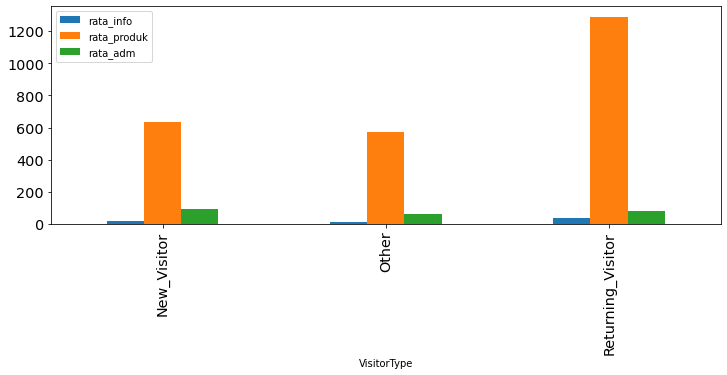

In [36]:
df_grup.plot(x="VisitorType", y=["rata_info", "rata_produk", "rata_adm"], kind="bar")

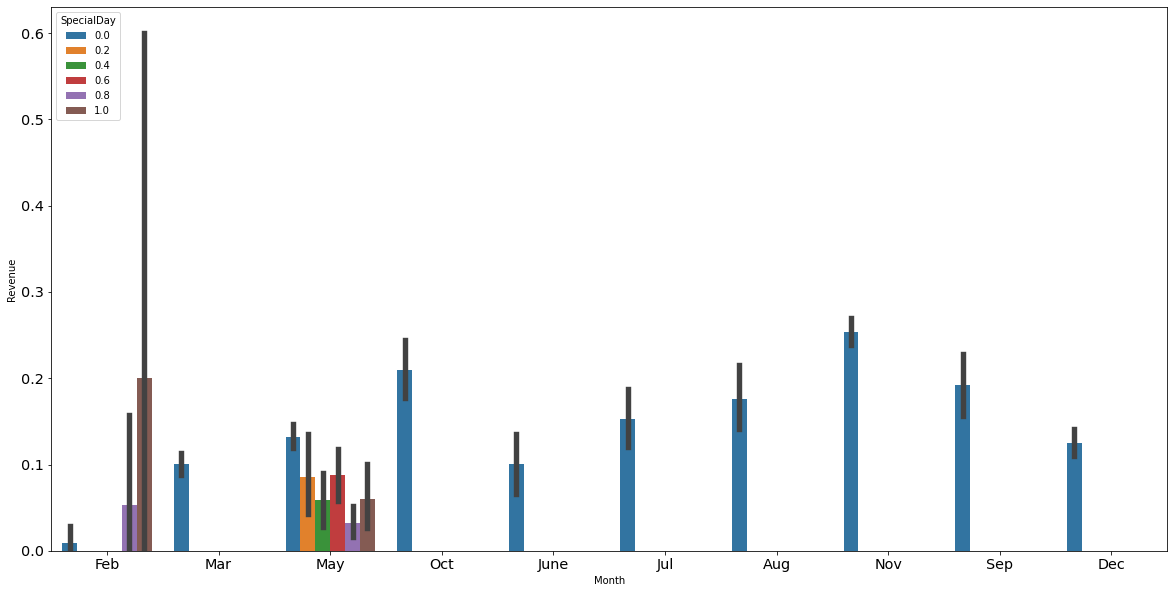

In [37]:
plt.figure(figsize =(20,10))
sns.barplot(x='Month', y='Revenue', data=df, hue='SpecialDay')

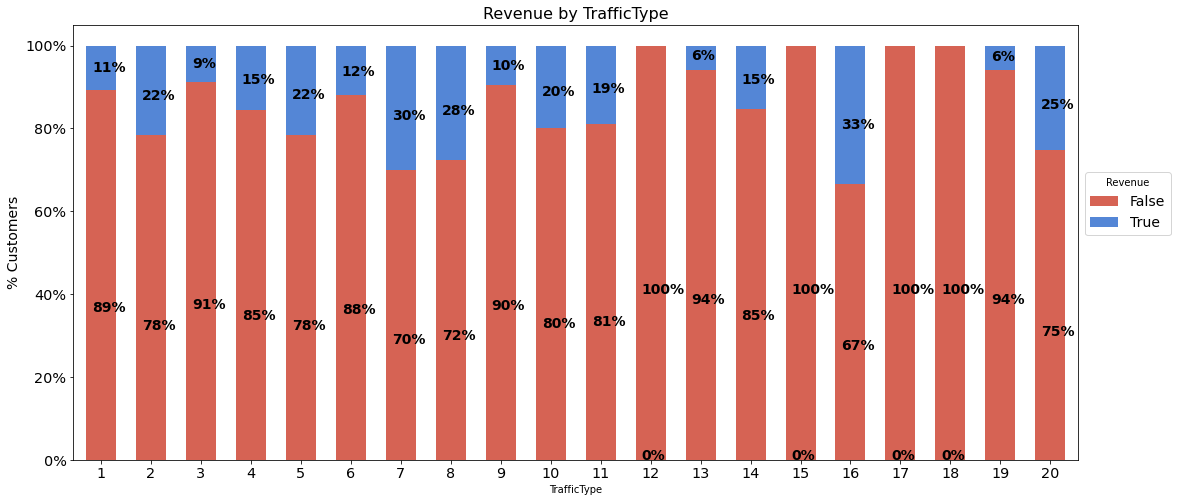

In [38]:
import matplotlib.ticker as mtick
traffic_revenue = df1.groupby(['TrafficType','Revenue']).size().unstack()

ax = (traffic_revenue.T*100.0 / traffic_revenue.T.sum()).T.plot(kind='bar',
                                                                width = 0.6,
                                                                stacked = True,
                                                                rot = 0,color = ['#d66354','#5486d6'] ,
                                                                figsize = (18,8))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(bbox_to_anchor=(1, 0.5),loc='lower left',prop={'size':14},title = 'Revenue')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Revenue by TrafficType',size = 16)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.20*width, p.get_y()+.4*height),
                color = 'black',
               weight = 'bold',size =14)

**Pengamatan**
1. Ternyata waktu yang dihabiskan customer di website cukup tinggi (rata-rata 20 menit mencari informasi product), dan prestasi page yang cukup mengesankan, yaitu 2% bounce rate, 4% exit rate. Berarti setidaknya 1 orang melihat 25-50 halaman sekali kunjungan. Maka mungkin hal ini terjadi karena :

    a. Terlalu banyak pilihan produk dengan rating yang mirip-mirip sehingga fokus membandingkan
    
    b. Pilihan voucher terbatas pada toko-toko tertentu sehingga harus cari-cari
    
    Sehingga rekomendasi bisnisnya :
    Mempercepat time to checkout dengan memberikan judul halaman  'Apakah Ini Produk yang Kamu Cari?' pada halaman ke 24 (dengan asumsi orang exit rata-rata di halaman ke 25). Halam berisi top products dengan pilihan voucher dan pengiriman yang paling banyak.
    Membuat advance filtering toko dengan voucher, distance, dan  top product.
    
    Kemungkinan pada kasus ini customer mengalamai SEARCH FATIGUE. (Search Fatigue: Online Shoppers Grow Weary, Take a Break - UCLA Anderson Review) 

2. Pengunjung didominasi pengunjung lama 'ReturningVisitor', namun angka konversi pengunjung baru 'NewVisitor' masih lebih bagus dibandingkan konversi pengunjung lama. Oleh karena itu di page 'ProdukRelated' harus ada call to actionnya supaya mempersingkat nilai 'ProdukRelated_duration' sehingga meningkatkan conversion rate. 
Rekomendasi : Ada baiknya kita memberikan treatment khusus pada pengunjung lama 'ReturningVisitor', seperti melacak history produk yang dilihat dan memberikan promo terkait produk yang sering dilihat


3. Pengunjung lebih banyak melakukan transaksi saat Weekdays, sehingga tim marketing perlu melakukan campaign/promosi saat weekend untuk meningkatkan jumlah transaksi saat weekend.

4. Mei, November bulan paling banyak penjualan. Tapi kenapa conversion Mei jelek? Dan banyak orang yang browsing mendekati hari raya/liburan di bulan mei. Kemungkinan ada campaign mengenai hari raya yang sukses di Bulan Mei. Namun campaign tsb kurang bagus prestasinya pada conversion, melainkan bagus di peningkatan kunjungan saja. 
Perlu dicari tau di bulan November kok gaada hari raya atau apapun tapi konversion tinggi?
Insight ini bisa menjadi tolak ukur acuan untuk tahun berikutnya.
Kapan waktu yang tepat melakukan campaign dan bagaimana caranya (seperti yang dilakukan pada Mei dan November)


Dengan strategi ini, maka customer tidak akan mengalami SEARCH FATIGUE, maka waktu untuk checkout serta conversion rate bisa lebih tinggi, terutama untuk Returning Customer.



# STAGE 2 - Pre Processing

## 1. Data Cleansing

### Handling Missing Value

In [39]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

* Tidak ada kolom yang memiliki nilai kosong, sehingga tidak ada Handling Missing Values

### Handling Duplicated Data

In [40]:
#Menghitung jumlah duplicate
df.duplicated().sum()

125

* Pada tahap ini terdapat 125 data yang duplikat, namun kami mengasumsikan setiap baris pada dataset ini adalah sesi kunjungan user yang kebetulan memiliki pola sama sehingga kami memutuskan untuk tidak menghapus data duplikat

### Handling VisitorType Data

In [41]:
### Handling VisitorType Data
#Drop semua baris dengan nilai New_Visitor
df = df.drop(df[df['VisitorType']=='New_Visitor'].index)
#Replace semua baris dengan nilai Other menjadi Returning_Visitor
df['VisitorType'].replace('Other', 'Returning_Visitor', inplace=True)

In [42]:
#Cek nilai VisitorType
df['VisitorType'].value_counts()

Returning_Visitor    10636
Name: VisitorType, dtype: int64

### Log Tranformation

In [43]:
df['log_Administrative']= np.log(df['Administrative']+np.finfo(float).eps)
df['log_Administrativeduration']= np.log(df['Administrative_Duration']+np.finfo(float).eps)
df['log_Informational']= np.log(df['Informational']+np.finfo(float).eps)
df['log_Informationalduration']= np.log(df['Informational_Duration']+np.finfo(float).eps)
df['log_ProductRelated']= np.log(df['ProductRelated']+np.finfo(float).eps)
df['log_ProdcutRelatedDuration']= np.log(df['ProductRelated_Duration']+np.finfo(float).eps)
df['log_BounceRates']= np.log(df['BounceRates']+np.finfo(float).eps)
df['log_ExitRates']= np.log(df['ExitRates']+np.finfo(float).eps)
df['log_PageValues']= np.log(df['PageValues']+np.finfo(float).eps)
df['log_SpecialDay']= np.log(df['SpecialDay']+np.finfo(float).eps)

In [44]:
log=['log_Administrative','log_Administrativeduration','log_Informational','log_Informationalduration','log_ProductRelated','log_ProdcutRelatedDuration','log_BounceRates','log_ExitRates','log_PageValues','log_SpecialDay']

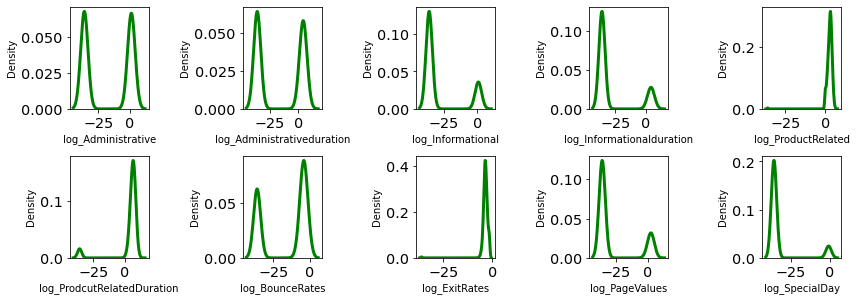

In [45]:
features = log
plt.figure(figsize=(12, 10))
for i in range(0, len(log)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

**bold text**### Drop Kolom lama

In [46]:
df = df.drop(columns=['Administrative', 'Administrative_Duration', 'Informational',
                       'Informational_Duration', 'ProductRelated','ProductRelated_Duration',
                       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'])

### Handling Outliers

### Z-Score

In [47]:
log=['log_Administrative','log_Administrativeduration','log_Informational','log_Informationalduration','log_ProductRelated','log_ProdcutRelatedDuration','log_BounceRates','log_ExitRates','log_PageValues','log_SpecialDay']
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in log:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 10636
Jumlah baris setelah memfilter outlier: 9883


Hasil Pengamatan :

Handling outliers dilakukan dengan menggunakan z-score karena jika menggunakan IQR akan lebih banyak baris data yang terhapus. Jumlah baris data setelah memfilter outlier adalah 9883

## 2. Feature Encoding

In [48]:
# For TrafficType
from collections import Counter
def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append(0)

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 0)

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column

#Call the function with a default threshold of 75%
agg_TrafficType,new_category_list=cumulatively_categorise(df['TrafficType'],return_categories_list=True)
df['agg_TrafficType'] = agg_TrafficType

In [49]:
# For Month
from collections import Counter
def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append(0)

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 0)

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column

#Call the function with a default threshold of 75%
agg_Month,new_category_list=cumulatively_categorise(df['Month'],return_categories_list=True)
df['agg_Month'] = agg_Month

In [50]:
# For OperatingSystems
from collections import Counter
def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append(0)

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 0)

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column

#Call the function with a default threshold of 75%
agg_OperatingSystems,new_category_list=cumulatively_categorise(df['OperatingSystems'],return_categories_list=True)
df['agg_OperatingSystems'] = agg_OperatingSystems

In [51]:
# For Browser
from collections import Counter
def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append(0)

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 0)

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column

#Call the function with a default threshold of 75%
agg_Browser,new_category_list=cumulatively_categorise(df['Browser'],return_categories_list=True)
df['agg_Browser'] = agg_Browser

In [52]:
# For Region
from collections import Counter
def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append(0)

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 0)

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column

#Call the function with a default threshold of 75%
agg_Region,new_category_list=cumulatively_categorise(df['Region'],return_categories_list=True)
df['agg_Region'] = agg_Region

In [53]:
# Label Encoding Revenue & Weekend
mapping_revenue = {False : 0, True : 1}
mapping_weekend = {False : 0, True : 1}

df['Revenue'] = df['Revenue'].map(mapping_revenue)
df['Weekend'] = df['Weekend'].map(mapping_weekend)
# One hot encoder `Month`, `OperatingSystems`, `Browser`, `Region`, `TrafficType`, `VisitorType`
# WARNING: run code ini sekali saja
cats_agg = ['agg_Month', 'agg_OperatingSystems', 'agg_Browser', 'agg_Region', 'agg_TrafficType']
for cats_agg in ['agg_Month', 'agg_OperatingSystems', 'agg_Browser', 'agg_Region', 'agg_TrafficType', 'VisitorType']:
    onehots = pd.get_dummies(df[cats_agg], prefix=cats_agg)
    df = df.join(onehots)

In [54]:
df = df.drop(['agg_Month','Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9883 entries, 1 to 12328
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Weekend                        9883 non-null   int64  
 1   Revenue                        9883 non-null   int64  
 2   log_Administrative             9883 non-null   float64
 3   log_Administrativeduration     9883 non-null   float64
 4   log_Informational              9883 non-null   float64
 5   log_Informationalduration      9883 non-null   float64
 6   log_ProductRelated             9883 non-null   float64
 7   log_ProdcutRelatedDuration     9883 non-null   float64
 8   log_BounceRates                9883 non-null   float64
 9   log_ExitRates                  9883 non-null   float64
 10  log_PageValues                 9883 non-null   float64
 11  log_SpecialDay                 9883 non-null   float64
 12  agg_TrafficType                9883 non-null   

In [55]:
df["Weekend"] = df["Weekend"].astype("int")
df["Revenue"] = df["Revenue"].astype("int")

Hasil Pengamatan :

Untuk dataset kami diperlukan feature encoding, karena  ada data yang berbentuk kategorikal dan ada beberapa data yang memiliki kardinalitas tinggi.
untuk menangani data dengan kardinalitas yang tinggi digunakan fungsi Agregasi sederhana, idenya dengan membiarkan instance milik nilai dengan frekuensi tinggi apa adanya dan ganti instance lain dengan kategori baru yang akan kita sebut other (pada dataset ini disebut 0). langkahnya:
1. Pilih ambang batas (pada data kami menggunakan 75%)
2. Urutkan nilai unik di kolom berdasarkan frekuensinya dalam urutan menurun
3. Terus tambahkan frekuensi nilai unik yang diurutkan (turun) ini hingga ambang tercapai.
4. Hasil Kategori unik pada proses 2 & 3 yang akan disimpan, dan contoh dari semua kategori lainnya akan diganti dengan 0

## 3. Feature Selection

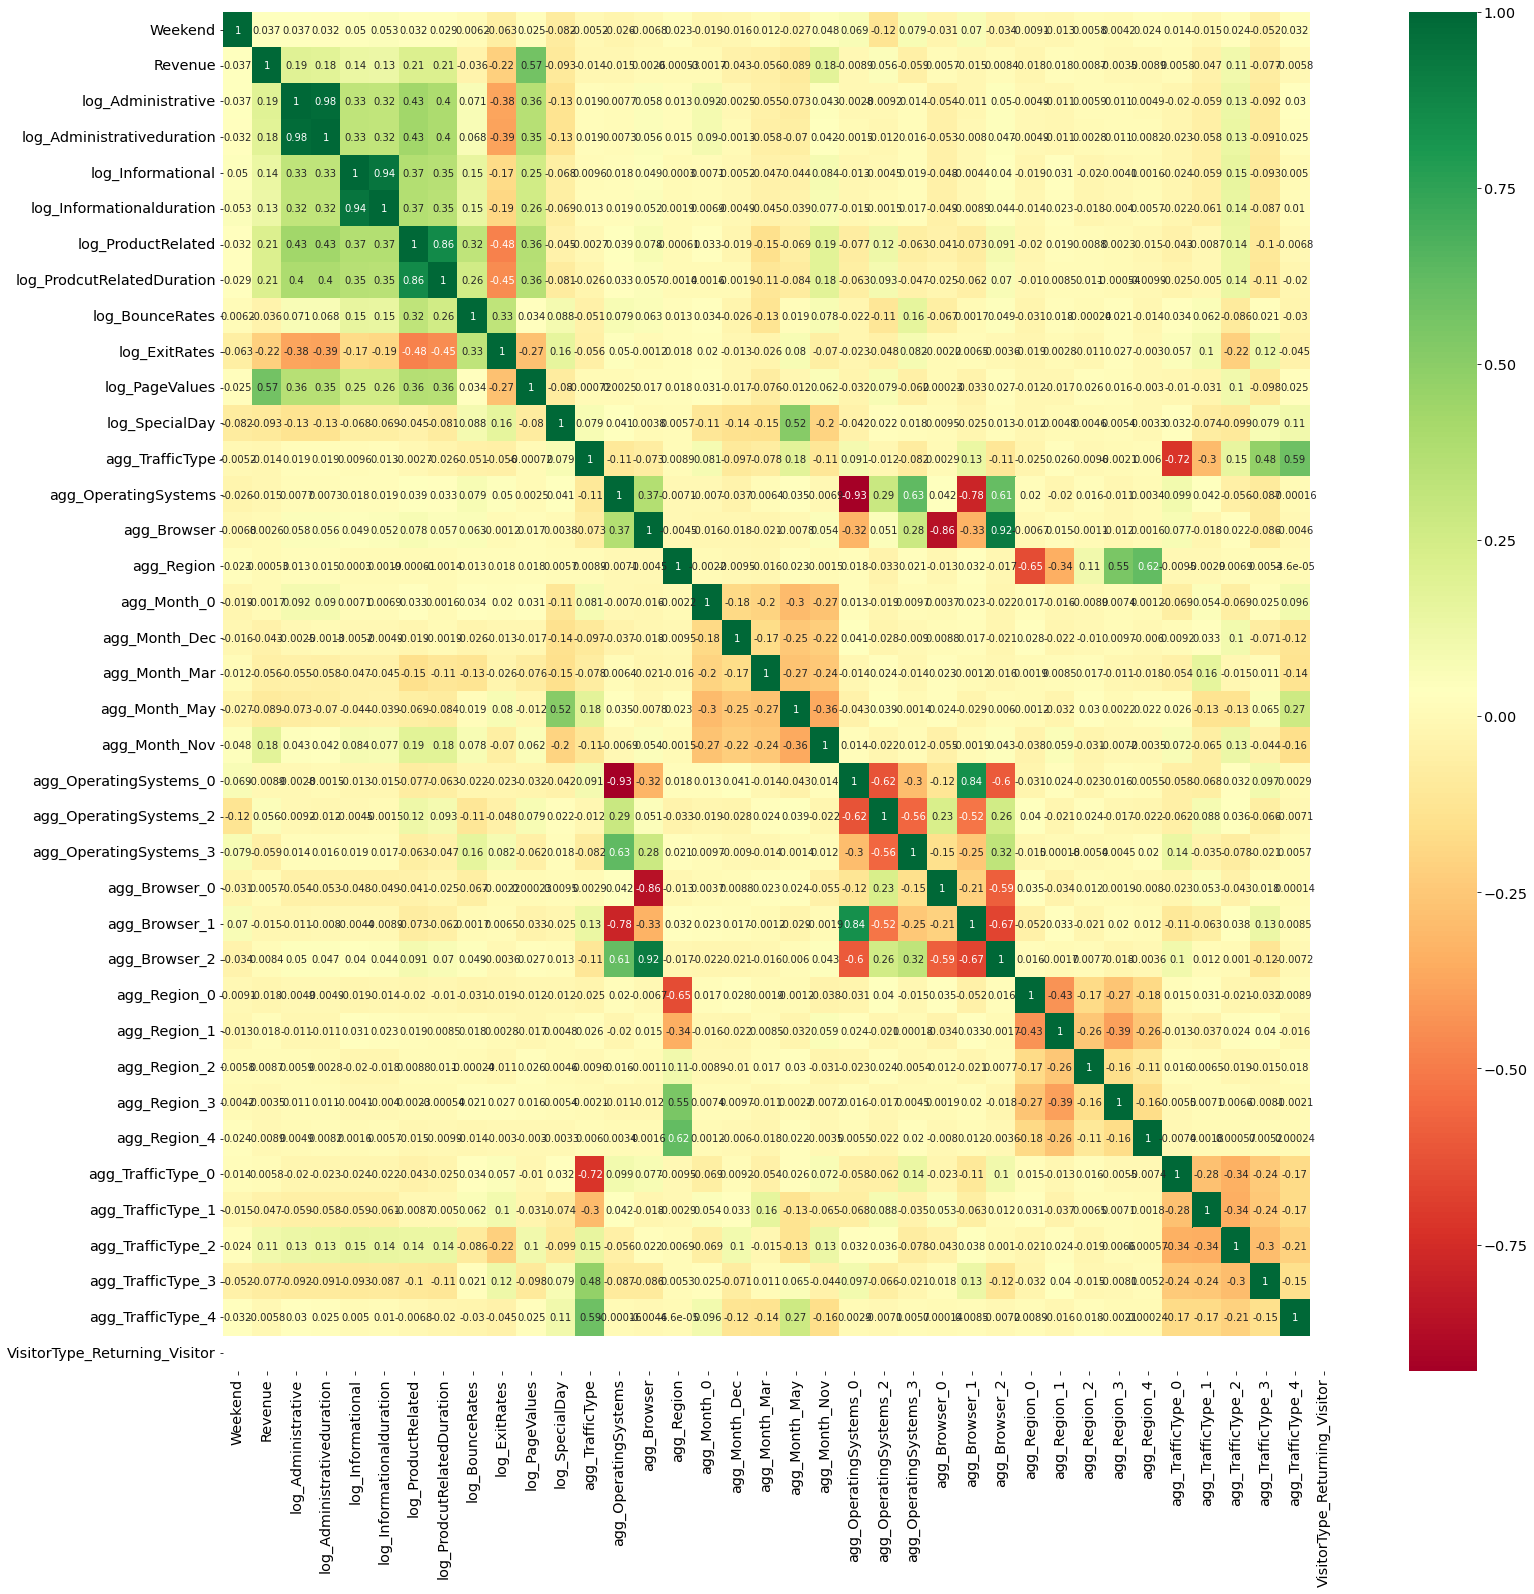

In [56]:
corrmat = df.corr() #menghitung korelasi dengan fungsi corr()
top_corr_features = corrmat.index #menampilkan index
plt.figure(figsize=(25,25)) #membuat plot dengan ukuran 20x20
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn") #menampilkan heatmap

In [57]:
a = corrmat['Revenue'] #mengambil nilai korelasi Revenue
hasil = a[(a>0.05)|(a<-0.05)] #mengambil nilai korelasi yang lebih dari 0.1
hasil

Revenue                       1.000000
log_Administrative            0.190752
log_Administrativeduration    0.184802
log_Informational             0.136688
log_Informationalduration     0.132030
log_ProductRelated            0.209034
log_ProdcutRelatedDuration    0.212458
log_ExitRates                -0.220272
log_PageValues                0.574502
log_SpecialDay               -0.093382
agg_Month_Mar                -0.056020
agg_Month_May                -0.088977
agg_Month_Nov                 0.175608
agg_OperatingSystems_2        0.055867
agg_OperatingSystems_3       -0.058851
agg_TrafficType_2             0.106096
agg_TrafficType_3            -0.077456
Name: Revenue, dtype: float64

Hasil Pengamatan Data Redundant:

Pada tahap feature selection ini fitur yang redundant adalah :
1. log_BounceRate-log_exitRate
2. log_ProductRelated-log_ProductRelated_Duration
3. agg_OperatingSystem_1-agg_Browser_1
4. agg_Browser_2-agg_Browser
5. agg_Browser-agg_Browser
6. VisitorType_ReturningVisitor-VisitorType_NewVisitor
7. agg_TrafficType_0-agg_TrafficType

#### Data yang kami pilih berdasarkan pengamatan diatas:

In [58]:
df_selection=df[['log_Administrative','log_Informational','log_ProductRelated','log_ExitRates',
              'log_PageValues','agg_Month_Nov','agg_OperatingSystems_2','agg_TrafficType_2','Revenue']]

### Feature Extraction

Pada tahap ini tidak ada fitur yang bisa di ekstrak karena semua fitur hasil selection sudah well classified sehingga tidak ada yang perlu di ekstrak

# STAGE 3 -  Modeling and Evaluation

## Split Data

In [59]:
# Split Feature and Label
X = df_selection[['log_Administrative','log_Informational','log_ProductRelated','log_ExitRates',
              'log_PageValues','agg_Month_Nov','agg_OperatingSystems_2','agg_TrafficType_2']]
y = df_selection['Revenue'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [60]:
df_selection['Revenue'].value_counts()

0    8422
1    1461
Name: Revenue, dtype: int64

## Class Imbalance

In [61]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [62]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    8422
1    1461
Name: Revenue, dtype: int64


UNDERSAMPLING
0    1019
1    1019
Name: Revenue, dtype: int64


OVERSAMPLING
0    5899
1    5899
Name: Revenue, dtype: int64


SMOTE
0    5899
1    5899
Name: Revenue, dtype: int64


## Model Evaluation

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print('AUC:'+ str(roc_auc_score(y_test, y_pred)))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

### 1. Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(lr)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.51
Recall (Test Set): 0.80
F1-Score (Test Set): 0.62
AUC:0.8328742088621784


In [65]:
print('Train score: ' + str(lr.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score: ' + str(lr.score(X_test, y_test))) #accuracy

Train score: 0.837684353280217
Test score: 0.8553119730185498


#### Tuning Hyperparameters

In [66]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1', 'elasticnet', 'none']
C = [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]
hyperparameters = dict(penalty=penalty, C=C, solver=solver )

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
lr_tuned = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
lr_tuned.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(lr_tuned)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.51
Recall (Test Set): 0.80
F1-Score (Test Set): 0.62
AUC:0.8324778553148141


In [67]:
print('Train score: ' + str(lr.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score: ' + str(lr.score(X_test, y_test))) #accuracy

Train score: 0.837684353280217
Test score: 0.8553119730185498


In [68]:
logres = LogisticRegression(penalty='l2', C=0.0001, solver='lbfgs', random_state=42)
logres.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = logres.predict(X_test)


0.8406509577894559


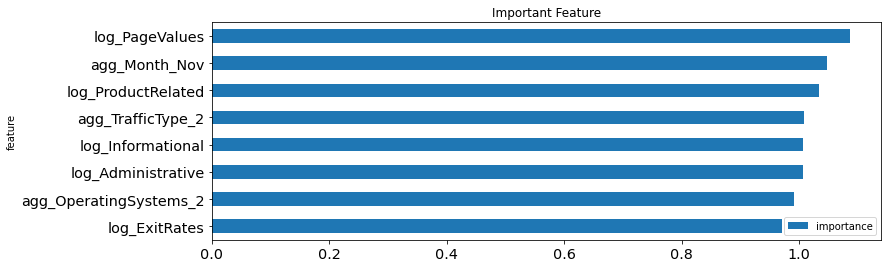

In [69]:
import math

feature_names = X_over_SMOTE.columns.to_list()

#Get the scores
score = logres.score(X_over_SMOTE.values, y_over_SMOTE)
print(score)
w0 = logres.intercept_[0]
w = logres.coef_[0]

feature_importance = pd.DataFrame(feature_names, columns = ['feature'])
feature_importance['importance'] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by=['importance'],ascending=False)
feature_importance = feature_importance[:8].sort_values(by=['importance'], ascending=False)

#Visualization
ax = feature_importance.sort_values(by=['importance'], ascending=True).plot.barh(x='feature', y='importance')

plt.title('Important Feature')
plt.show()

In [70]:
print('Train score: ' + str(lr_tuned.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(lr_tuned.score(X_test, y_test))) #accuracy

Train score: 0.8203085268689608
Test score:0.8009049773755657


### 2. Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(dt)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.46
Recall (Test Set): 0.57
F1-Score (Test Set): 0.51
AUC:0.7261515325969408


In [72]:
print('Train score: ' + str(dt.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(dt.score(X_test, y_test))) #accuracy

Train score: 0.9991523987116461
Test score:0.8340640809443508


#### Tuning Hyperparameters

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
dt_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification(dt_tuned)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.46
Recall (Test Set): 0.61
F1-Score (Test Set): 0.52
AUC:0.7426078269961602


Text(0.5, 1.0, 'feature importance score')

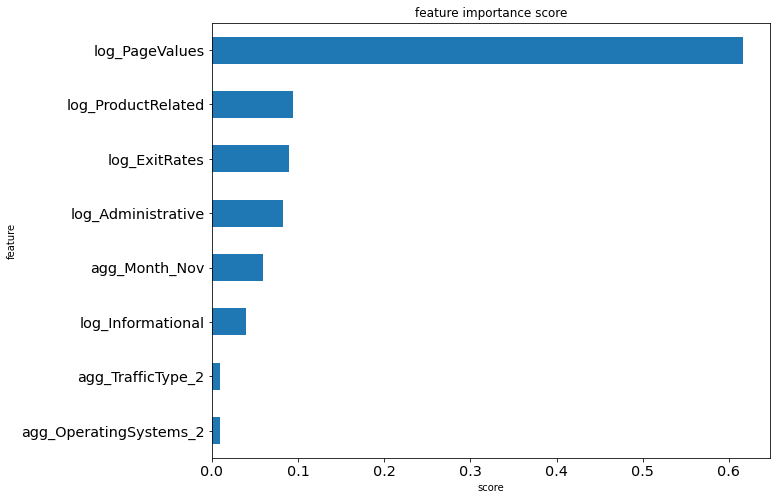

In [74]:
# plt.figsize(10, 8)
feat_importances = pd.Series(dt_tuned.best_estimator_.feature_importances_, index=X_over_SMOTE.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### 3. Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(rf)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.53
Recall (Test Set): 0.72
F1-Score (Test Set): 0.61
AUC:0.8035041419842427


In [76]:
print('Train score: ' + str(rf.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(rf.score(X_test, y_test))) #accuracy

Train score: 0.9991523987116461
Test score:0.8640809443507589


#### Tuning Hyperparameters

In [77]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification(rf_tuned)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.54
Recall (Test Set): 0.72
F1-Score (Test Set): 0.61
AUC:0.8059647621968389


Text(0.5, 1.0, 'feature importance score')

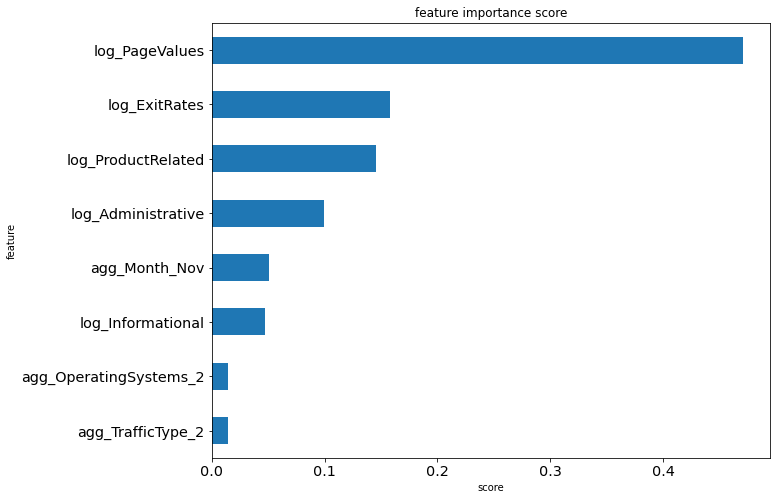

In [78]:
# plt.figsize(10, 8)
feat_importances = pd.Series(rf_tuned.best_estimator_.feature_importances_, index=X_over_SMOTE.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### 4. AdaBoost

In [79]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(ab)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.54
Recall (Test Set): 0.79
F1-Score (Test Set): 0.64
AUC:0.8366149075563638


In [80]:
print('Train score: ' + str(ab.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(ab.score(X_test, y_test))) #accuracy

Train score: 0.8532802169859298
Test score:0.866441821247892


#### Tuning Hyperparameters

In [81]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.53
Recall (Test Set): 0.80
F1-Score (Test Set): 0.64
AUC:0.8373497757284565


In [82]:
print('Train score: ' + str(ab_tuned.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score: ' + str(ab_tuned.score(X_test, y_test))) #accuracy

Train score: 0.8374300728937109
Test score: 0.7963800904977375


Text(0.5, 1.0, 'feature importance score')

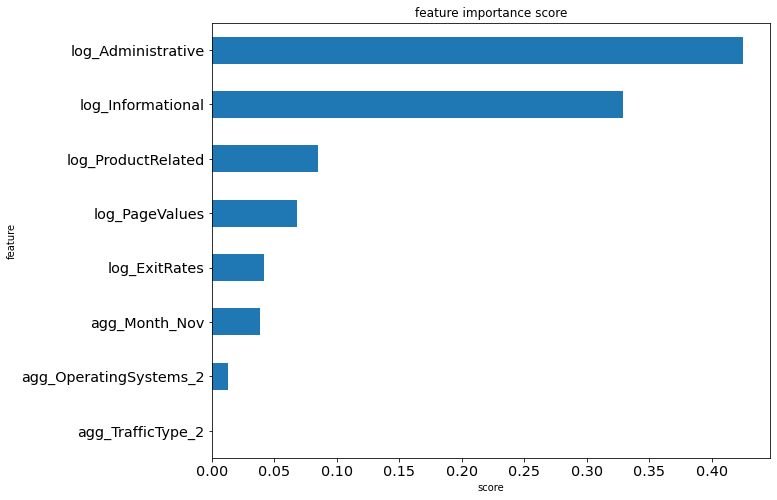

In [83]:
# plt.figsize(10, 8)
feat_importances = pd.Series(ab_tuned.best_estimator_.feature_importances_, index=X_over_SMOTE.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### 5. XGBoost

In [84]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(xg)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.51
Recall (Test Set): 0.82
F1-Score (Test Set): 0.63
AUC:0.8404789062794238


In [85]:
print('Train score: ' + str(xg.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(xg.score(X_test, y_test))) #accuracy

Train score: 0.8821834209187998
Test score:0.8539629005059022


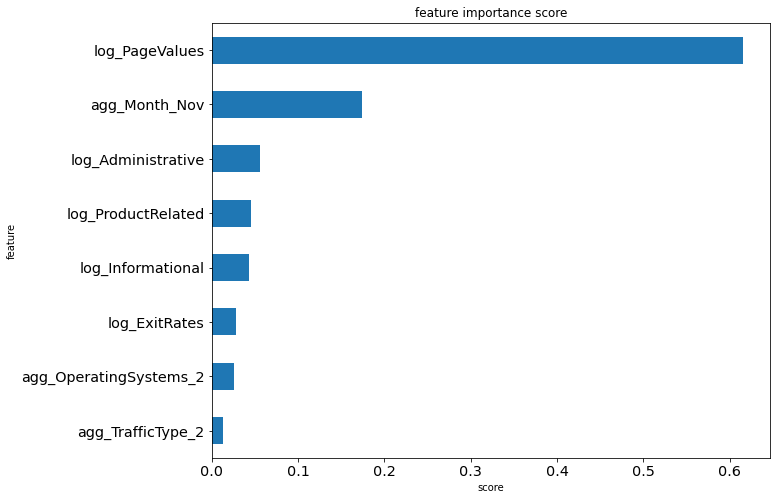

In [86]:
show_feature_importance(xg)

#### Tuning Hyperparameters

In [87]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.53
Recall (Test Set): 0.63
F1-Score (Test Set): 0.58
AUC:0.7659263284569292


In [88]:
print('Train score: ' + str(xg_tuned.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(xg_tuned.score(X_test, y_test))) #accuracy

Train score: 0.9923715884048143
Test score:0.6289592760180995


Text(0.5, 1.0, 'feature importance score')

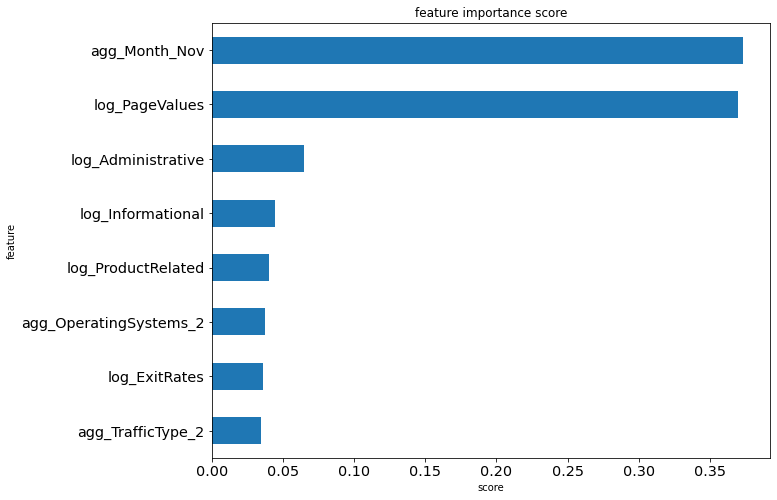

In [89]:
# plt.figsize(10, 8)
feat_importances = pd.Series(xg_tuned.best_estimator_.feature_importances_, index=X_over_SMOTE.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

[link text](https://)### Applied Best feature in Logistics Regression

In [90]:
# Split Feature and Label
X_imp = X_over_SMOTE[['log_PageValues','agg_Month_Nov','log_ProductRelated','agg_TrafficType_2',
                 'log_Informational','log_Administrative']]
y_imp = y_over_SMOTE # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size = 0.3, random_state = 42)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_class(model):
    y_pred_imp = model.predict(X_test_imp)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test_imp, y_pred_imp))
    print("Precision (Test Set): %.2f" % precision_score(y_test_imp, y_pred_imp))
    print("Recall (Test Set): %.2f" % recall_score(y_test_imp, y_pred_imp))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test_imp, y_pred_imp))
    print('AUC:'+ str(roc_auc_score(y_test_imp, y_pred_imp)))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [92]:
from sklearn.linear_model import LogisticRegression
lr_imp = LogisticRegression(random_state=42)
lr_imp.fit(X_train_imp,y_train_imp)

eval_class(lr_imp)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.85
Recall (Test Set): 0.84
F1-Score (Test Set): 0.84
AUC:0.8489272030651341


[[1552  248]
 [ 286 1454]]


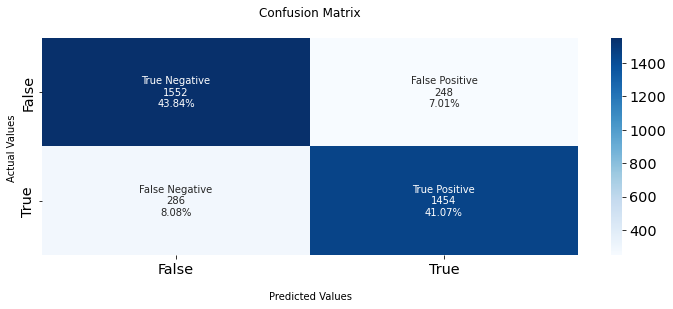

In [93]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
y_pred_c = lr_imp.predict(X_test_imp)
cf_matrix = confusion_matrix(y_test_imp, y_pred_c)

print(cf_matrix)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# STAGE 4 - Presentation Final Project! wish me luck